In [1]:
import pandas as pd
import numpy as np

In [137]:
X = 5* np.random.rand(50,1) - 2
Y = 0.7 * X**2 - 2 * X + 3 + np.random.randn(50,1)

In [138]:
import matplotlib.pyplot as plt

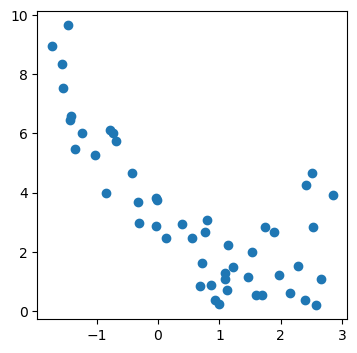

In [139]:
plt.figure(figsize = (4,4))
plt.scatter(X,Y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size =  0.2, random_state = 23)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pf = PolynomialFeatures()
x_train_trf = pf.fit_transform(x_train, y_train)
x_test_trf = pf.transform(x_test)

In [12]:
from sklearn.linear_model import Ridge

In [82]:
def bias_variance_mc(model, X, y, n_rounds=100):
    preds = []

    for _ in range(n_rounds):
        idx = np.random.choice(len(X), len(X), replace=True)
        model.fit(X[idx], y[idx])
        preds.append(model.predict(X))

    preds = np.array(preds)
    y_hat = preds.mean(axis=0)

    bias = np.mean((y_hat - y) ** 2)
    variance = np.mean(np.var(preds, axis=0))

    return bias, variance

In [87]:
lambda_ = np.linspace(0,30,100)
bias = []
variance = []
for i in lambda_:
    R = Ridge(alpha = i)
    b, v = bias_variance_mc(R, x_train_trf, y_train)
    bias.append(b)
    variance.append(v)

In [88]:
bias

[np.float64(9.070193230640209),
 np.float64(9.155804547907444),
 np.float64(9.10458412697049),
 np.float64(9.096503715413077),
 np.float64(9.007300695659392),
 np.float64(8.957238524122147),
 np.float64(8.937867660252254),
 np.float64(8.868849571373373),
 np.float64(8.820119190827858),
 np.float64(8.865575855317816),
 np.float64(8.79268746016384),
 np.float64(8.801180668236942),
 np.float64(8.808031467663909),
 np.float64(8.79067877853968),
 np.float64(8.725394646407192),
 np.float64(8.719506535902108),
 np.float64(8.750182499120122),
 np.float64(8.6259092730447),
 np.float64(8.576192840008956),
 np.float64(8.622508283505397),
 np.float64(8.550493353826564),
 np.float64(8.59101618275151),
 np.float64(8.511865634672422),
 np.float64(8.5394071797748),
 np.float64(8.468026849334093),
 np.float64(8.402675666177746),
 np.float64(8.351162678073301),
 np.float64(8.448381376958642),
 np.float64(8.41856676238685),
 np.float64(8.307941160380167),
 np.float64(8.321719867544214),
 np.float64(8.256

In [89]:
variance

[np.float64(0.04188756749697147),
 np.float64(0.04098008614264924),
 np.float64(0.04909415108190656),
 np.float64(0.04855241933504082),
 np.float64(0.041719587662237365),
 np.float64(0.04487796285509976),
 np.float64(0.03948314367295571),
 np.float64(0.03650888210061257),
 np.float64(0.04835796873622667),
 np.float64(0.042803325070151145),
 np.float64(0.04746552840716515),
 np.float64(0.04504803956474779),
 np.float64(0.04300734499793287),
 np.float64(0.03551208675569491),
 np.float64(0.039670675947976894),
 np.float64(0.04597864388751825),
 np.float64(0.03576759643484815),
 np.float64(0.041944535371593386),
 np.float64(0.04007463854126516),
 np.float64(0.04676649484504038),
 np.float64(0.04922612820848094),
 np.float64(0.04465138774883483),
 np.float64(0.047951761729040754),
 np.float64(0.038191005110017),
 np.float64(0.03634510579500684),
 np.float64(0.03905505049924195),
 np.float64(0.04769647840647349),
 np.float64(0.04963741191033958),
 np.float64(0.040788680324655935),
 np.float6

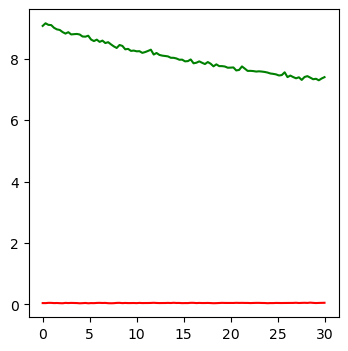

In [104]:
plt.figure(figsize = (4,4))
plt.plot(lambda_, bias, "g-")
plt.plot(lambda_, variance, "r-")
plt.show()

In [140]:
# IMPACT OF ALPHA OR LAMBDA ON THE LOSS FUNCITON..
from sklearn.linear_model import LinearRegression

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(X, Y)
lr.coef_, lr.intercept_

(array([[-1.36309162]]), array([4.06110431]))

In [143]:
def loss_fn(m, alpha):
    return np.sum((Y - m* X.ravel() + 3.96) ** 2) + alpha * m**2

In [144]:
def predict(m):
    return m * X + 3.96

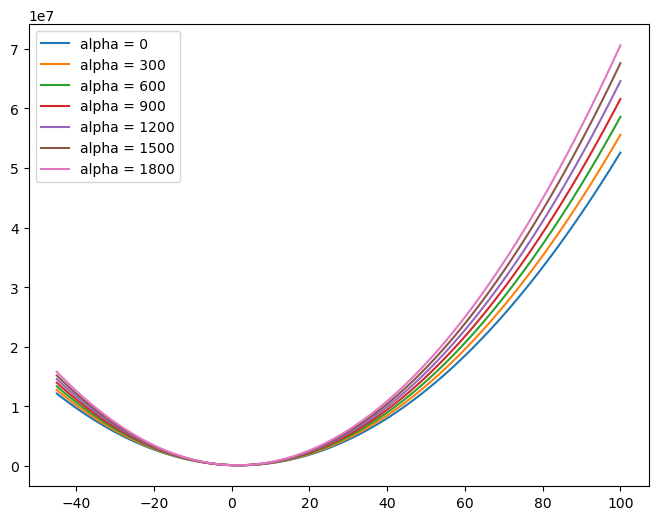

In [158]:
m = np.linspace(-45, 100, 100)

plt.figure(figsize=(8,6))

for j in [0, 300, 600, 900, 1200, 1500, 1800]:
    loss_values = []

    for i in range(100):
        loss_ = loss_fn(m[i], j)
        loss_values.append(loss_)

    plt.plot(m, loss_values, label=f'alpha = {j}')

plt.legend()
plt.show()

In [146]:
np.linspace(-45, 100, 100).shape[0]

100